# MUTUAL - Credit Scoring
## Projeto de Processo Seletivo
### Autor: Guilherme Ceratti Ramos

In [1]:
# Instalar os pacotes comuns

#!pip install -U pandas
#!pip install -U numpy
#!pip install -U seaborn
#!pip install -U matplotlib
#!pip install -U scikit-learn

In [2]:
# Importar pacotes comuns

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Selecionando o arquivo
filepath = os.path.abspath('MutualClients.csv')
df = pd.read_csv(filepath, index_col=0)

Explorar o arquivo, entender os dados

In [4]:
df

,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,...,professionCode,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth,BAD
1,2,15,F,S,18,0,NaN,Y,31,20,...,853,0.0,Y,N,0,N,N,300.0,0,0
2,4,12,F,C,47,0,NaN,N,31,25,...,35,0.0,Y,N,0,N,N,304.0,0,0
3,5,16,F,S,28,0,NaN,Y,31,25,...,24,0.0,Y,N,0,N,N,250.0,0,0
4,6,24,M,S,26,0,NaN,N,31,28,...,999,0.0,Y,N,0,N,N,800.0,0,0
5,7,55,F,S,22,0,NaN,Y,31,12,...,999,0.0,Y,N,0,N,N,410.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,49994,1,M,C,29,0,NaN,Y,31,12,...,305,0.0,Y,N,0,N,N,796.0,0,1
39997,49995,12,F,S,20,0,NaN,Y,31,20,...,712,0.0,Y,N,0,N,N,200.0,0,0
39998,49996,19,M,S,21,0,NaN,Y,31,12,...,218,0.0,Y,N,0,N,N,234.0,0,0
39999,49998,23,F,S,23,0,NaN,Y,31,28,...,991,0.0,Y,N,0,N,N,240.0,0,1


In [5]:
df.columns

Index(['clientId', 'shopId', 'gender', 'maritalStatus', 'age',
       'numberOfDependents', 'education', 'flagResidencialPhone',
       'areaCodeResidencialPhone', 'bestPaymentDay', 'shopRank',
       'residenceType', 'monthsInResidence', 'flagMothersName',
       'flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState', 'monthsInTheJob', 'professionCode',
       'mateIncome', 'flagResidencialAddress_PostalAddress', 'flagOtherCard',
       'quantityBankingAccounts', 'flagMobilePhone', 'flagContactPhone',
       'personalNetIncome', 'codeApplicationBooth', 'BAD'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1 to 40000
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   clientId                              40000 non-null  int64  
 1   shopId                                40000 non-null  int64  
 2   gender                                39997 non-null  object 
 3   maritalStatus                         40000 non-null  object 
 4   age                                   40000 non-null  int64  
 5   numberOfDependents                    40000 non-null  int64  
 6   education                             0 non-null      float64
 7   flagResidencialPhone                  40000 non-null  object 
 8   areaCodeResidencialPhone              40000 non-null  int64  
 9   bestPaymentDay                        40000 non-null  int64  
 10  shopRank                              40000 non-null  int64  
 11  residenceType  

Pra ter uma noção melhor dos dados, vamos ver a proporção dos clientes inadimplentes para os não-inadimplementes.

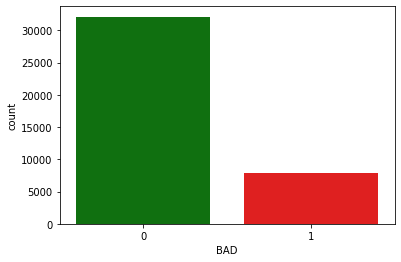

In [7]:
colors = ['green', 'red']
g = sns.countplot(
    x='BAD',
    data=df,
    palette=colors
)

Há muito mais clientes não-inadimplentes nesse cenário. Precisamos realizar uma análise e entender quais colunas se relacionam mais com a inadimplência ou não de um cliente. Primeiro, vamos verificar se existem valores nulos e, em caso afirmativo, em quais colunas.

In [8]:
df.isnull().sum()

clientId                                    0
shopId                                      0
gender                                      3
maritalStatus                               0
age                                         0
numberOfDependents                          0
education                               40000
flagResidencialPhone                        0
areaCodeResidencialPhone                    0
bestPaymentDay                              0
shopRank                                    0
residenceType                               0
monthsInResidence                           0
flagMothersName                             0
flagFathersName                             0
flagResidenceTown_WorkingTown               0
flagResidenceState_WorkingState             0
monthsInTheJob                              0
professionCode                              0
mateIncome                                  0
flagResidencialAddress_PostalAddress        0
flagOtherCard                     

Quem diria, parece que educação é NaN para todos os clientes, provavelmente por algum problema na coleta desses dados. Uma pena, pois era uma feature promissora. Porém, isso significa que será uma coluna a ser retirada na construção do modelo preditivo. Já gênero possui apenas três valores nulos, o que indica um problema apenas naqueles registros. Como o dataset é grande, irei optar por remover esses registros.

In [9]:
df.dropna(subset=['gender'], inplace=True)

In [10]:
df.drop('education', axis=1, inplace=True)

In [11]:
df.isnull().sum()

clientId                                0
shopId                                  0
gender                                  0
maritalStatus                           0
age                                     0
numberOfDependents                      0
flagResidencialPhone                    0
areaCodeResidencialPhone                0
bestPaymentDay                          0
shopRank                                0
residenceType                           0
monthsInResidence                       0
flagMothersName                         0
flagFathersName                         0
flagResidenceTown_WorkingTown           0
flagResidenceState_WorkingState         0
monthsInTheJob                          0
professionCode                          0
mateIncome                              0
flagResidencialAddress_PostalAddress    0
flagOtherCard                           0
quantityBankingAccounts                 0
flagMobilePhone                         0
flagContactPhone                  

Agora que removemos valores nulos, nossa preocupação seria valores 0, ou extremamente repetidos (o mesmo valor em todos os registros pra algo que deveria, logicamente, variar). Vamos conferir quais colunas possuem apenas o mesmo valor em todos os registros.

In [12]:
repeated_values_cols = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        repeated_values_cols.append(df[col].name)
        print(f'Coluna {col}, valor unico: {df[col].unique()}')
repeated_values_cols

Coluna numberOfDependents, valor unico: [0]
Coluna flagOtherCard, valor unico: ['N']
Coluna quantityBankingAccounts, valor unico: [0]
Coluna flagMobilePhone, valor unico: ['N']
Coluna flagContactPhone, valor unico: ['N']
Coluna codeApplicationBooth, valor unico: [0]


['numberOfDependents',
 'flagOtherCard',
 'quantityBankingAccounts',
 'flagMobilePhone',
 'flagContactPhone',
 'codeApplicationBooth']

Colunas com apenas um valor não ajudam em nada o modelo a prever algo, portanto essas colunas também serão removidas. 

In [13]:
df.drop(repeated_values_cols, axis=1, inplace=True)

A coluna clientId não é útil para nós, já que se trata apenas de um identificador, e apenas confundiria o modelo.

In [14]:
df.drop('clientId', axis=1, inplace=True)

Enquanto clientId não pode ser aproveitada, shopId pode funcionar de maneira diferente. Hipótese: clientes de uma determinada loja podem ser mais inadimplentes, seja pela localização ou diversos outros fatores. Vamos testar

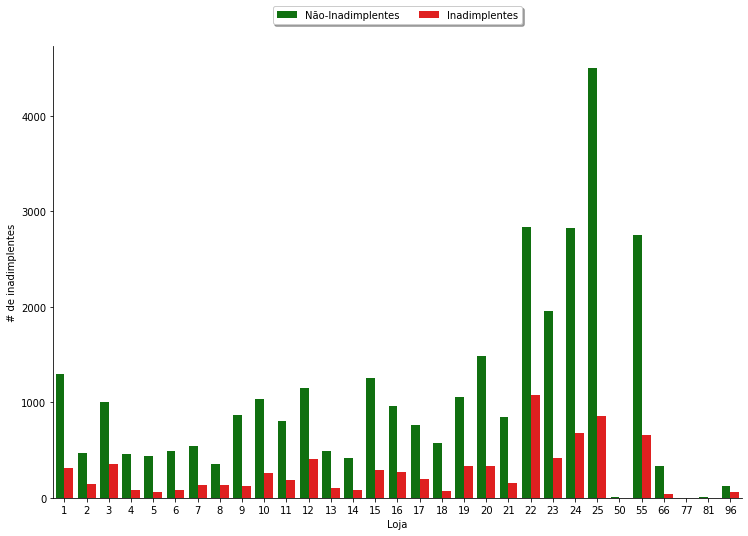

In [15]:
colors = ['green', 'red']
g = sns.catplot(        
    x='shopId',   
    data=df,
    kind='count',      
    hue='BAD', 
    palette=colors,   
    height=7,        
    aspect=1.5,        
    legend=False,       
    ).set_axis_labels('Loja', '# de inadimplentes')

g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=True, ncol=2, labels=['Não-Inadimplentes', 'Inadimplentes'])
plt.show()

A primeira vista, parece que as lojas tem uma diferença de clientes BAD para não-BAD entre si. Porém, essa tendência deve ser analisada pensando na quantidade total de clientes por loja. Portanto, essa coluna será mantida no modelo final.

<AxesSubplot:xlabel='gender', ylabel='BAD'>

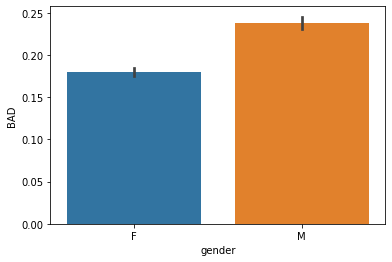

In [16]:
sns.barplot(x="gender",
           y="BAD",   # Set cus    # This allows for the separation of the plots
           data=df)

A difereça entre os inadimplentes por gênero é pequena. A featura será removida do dataset não apenas por isso, mas porque é uma característica que pode levar a um modelo que preveja possíveis inadimplentes de modo injusto.

In [17]:
df.drop('gender', axis=1, inplace=True)

Percebo que determinadas colunas se mostram categóricas, posteriormente podendo ser transformadas e pré-processadas de mono numérico. Salvaremos essa informação para mais tarde. Agora, vamos ver como as colunas se correlacionam entre si, para descobrir há alguma correlação muito exagerada que pode interferir no modelo.

In [18]:
df.corrwith(df["BAD"])

shopId                     -0.008823
age                        -0.164197
areaCodeResidencialPhone    0.075034
bestPaymentDay              0.032264
shopRank                    0.004737
monthsInResidence          -0.041999
monthsInTheJob             -0.094408
professionCode              0.030633
mateIncome                 -0.034121
personalNetIncome           0.003298
BAD                         1.000000
dtype: float64

In [19]:
df.corr()

,shopId,age,areaCodeResidencialPhone,bestPaymentDay,shopRank,monthsInResidence,monthsInTheJob,professionCode,mateIncome,personalNetIncome,BAD
shopId,1.000000,0.015335,0.132957,-0.007811,0.005771,0.034667,0.047412,-0.000304,0.016689,-0.001533,-0.008823
age,0.015335,1.000000,-0.014595,-0.007643,-0.030720,0.251562,0.362443,-0.076912,0.048822,-0.011309,-0.164197
areaCodeResidencialPhone,0.132957,-0.014595,1.000000,0.024379,-0.015896,0.015471,-0.000869,-0.007889,-0.030225,-0.001419,0.075034
bestPaymentDay,-0.007811,-0.007643,0.024379,1.000000,-0.001570,0.008805,-0.026680,0.015927,-0.005047,0.004157,0.032264
shopRank,0.005771,-0.030720,-0.015896,-0.001570,1.000000,-0.005200,-0.027294,-0.003108,-0.006404,-0.001465,0.004737
monthsInResidence,0.034667,0.251562,0.015471,0.008805,-0.005200,1.000000,0.100264,-0.018617,-0.014166,-0.004490,-0.041999
monthsInTheJob,0.047412,0.362443,-0.000869,-0.026680,-0.027294,0.100264,1.000000,-0.024750,0.001580,-0.007395,-0.094408
professionCode,-0.000304,-0.076912,-0.007889,0.015927,-0.003108,-0.018617,-0.024750,1.000000,0.037413,-0.002910,0.030633
mateIncome,0.016689,0.048822,-0.030225,-0.005047,-0.006404,-0.014166,0.001580,0.037413,1.000000,-0.001824,-0.034121
personalNetIncome,-0.001533,-0.011309,-0.001419,0.004157,-0.001465,-0.004490,-0.007395,-0.002910,-0.001824,1.000000,0.003298


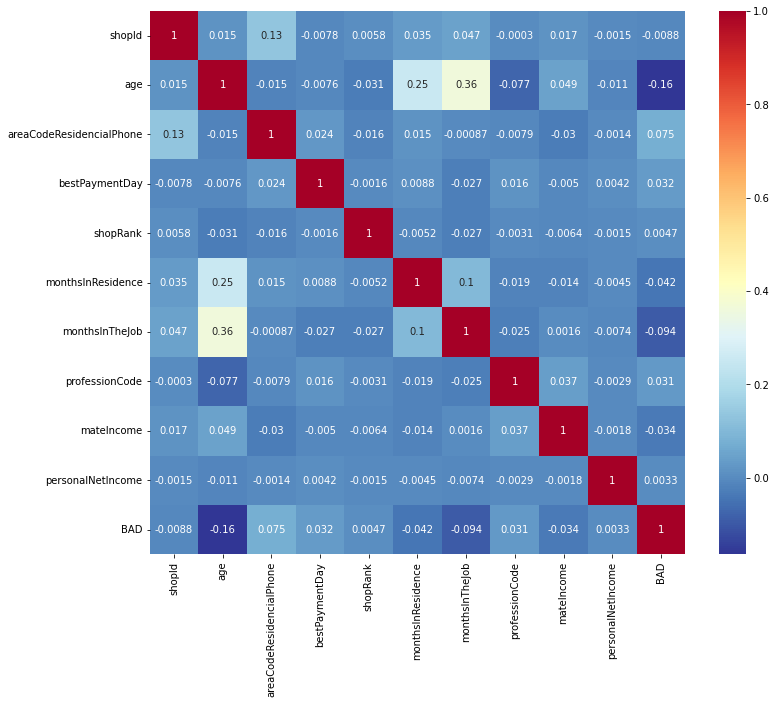

In [20]:
plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='RdYlBu_r')
plt.show()

O Heatmap nos mostra que as variáveis não possuem informações muito parecidas, então parece estar tudo ok a partir daqui.

## Preprocessamento, pipelines e modelo

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

## TESTAR VÁRIOS SCALERS TAMBEM TALVEZ FAZER UMA FUNCAO QUE PERMITA TESTAR VARIAS COISAS NAS PIPELINES

In [22]:
features = ['shopId', 'maritalStatus', 'age', 'flagResidencialPhone',
       'areaCodeResidencialPhone', 'bestPaymentDay', 'shopRank',
       'residenceType', 'monthsInResidence', 'flagMothersName',
       'flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState', 'monthsInTheJob', 'professionCode',
       'mateIncome', 'flagResidencialAddress_PostalAddress',
       'personalNetIncome']

# Features de treino
df_features = df[features]
X = pd.DataFrame(df_features)

# Target
y = df.BAD

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [24]:
# Selecionando colunas categóricas
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == 'object']
categorical_cols.append('professionCode')
categorical_cols.append('areaCodeResidencialPhone')
categorical_cols.append('shopId')
print(categorical_cols)

['maritalStatus', 'flagResidencialPhone', 'residenceType', 'flagMothersName', 'flagFathersName', 'flagResidenceTown_WorkingTown', 'flagResidenceState_WorkingState', 'flagResidencialAddress_PostalAddress', 'professionCode', 'areaCodeResidencialPhone', 'shopId']


In [25]:
# Selecionando colunas numéricas
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('professionCode')
numerical_cols.remove('areaCodeResidencialPhone')
numerical_cols.remove('shopId')
print(numerical_cols)

['age', 'bestPaymentDay', 'shopRank', 'monthsInResidence', 'monthsInTheJob', 'mateIncome', 'personalNetIncome']


In [26]:
categorical_transform = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [27]:
numerical_transform = Pipeline(steps = [('scaler', StandardScaler()),
                                        ('imputer', SimpleImputer(strategy='median'))])

In [28]:
preprocessor = ColumnTransformer(transformers = [('num', numerical_transform, numerical_cols),
                                                 ('cat', categorical_transform, categorical_cols)])

In [29]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression

In [30]:
models_list = [
    KNeighborsClassifier(3),
    LogisticRegression(random_state=0, max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

In [31]:
for model in models_list:
    p1 = Pipeline(steps=[('preprocessorlr', preprocessor), ('model', model)])
    p1.fit(X_train, y_train)
    print('Modelo: ', model)
    print('Score do modelo: ', p1.score(X_valid, y_valid))

Modelo:  KNeighborsClassifier(n_neighbors=3)
Score do modelo:  0.756
Modelo:  LogisticRegression(max_iter=1000, random_state=0)
Score do modelo:  0.803625
Modelo:  DecisionTreeClassifier()
Score do modelo:  0.70775
Modelo:  RandomForestClassifier()
Score do modelo:  0.80225
Modelo:  AdaBoostClassifier()
Score do modelo:  0.8055
Modelo:  GradientBoostingClassifier()
Score do modelo:  0.80475
